In [5]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

### Bell State

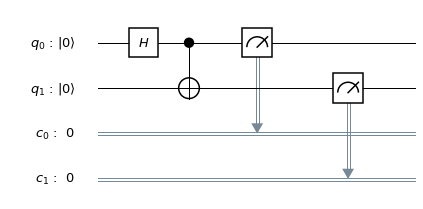

In [11]:
num_qubits = 2;
num_bits   = 2;
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0, 1)
bell.measure([0,1], [0,1])

bell.draw(output='mpl')

- initial state = |00>
- After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
- After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11> $


In [12]:
simulator = Aer.get_backend('qasm_simulator')


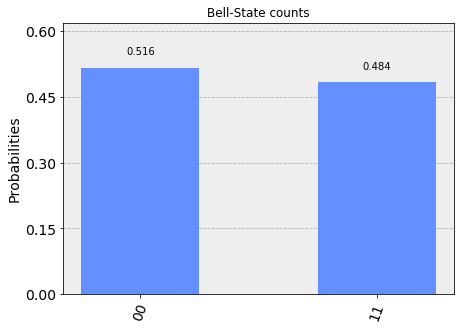

In [13]:
result = execute(bell, simulator).result()
counts = result.get_counts(bell)
plot_histogram(counts, title='Bell-State counts')

### Extended Circuit -1

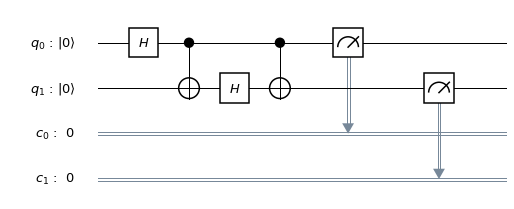

In [21]:
num_qubits = 2;
num_bits   = 2;
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0, 1)
bell.h(1)
bell.cx(0, 1)
bell.measure([0,1], [0,1])

bell.draw(output='mpl')


- initial state = |00>
- After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10> $
- After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11> $
- After application of Hadamard Gate: 
$\frac{1}{2}|00> + \frac{1}{2}|01> + \frac{1}{2}|10> - \frac{1}{2}|11> $
- After application of CNOT Gate: 
$\frac{1}{2}|00> + \frac{1}{2}|01> + \frac{1}{2}|11> - \frac{1}{2}|10> $


In [25]:
simulator = Aer.get_backend('qasm_simulator')

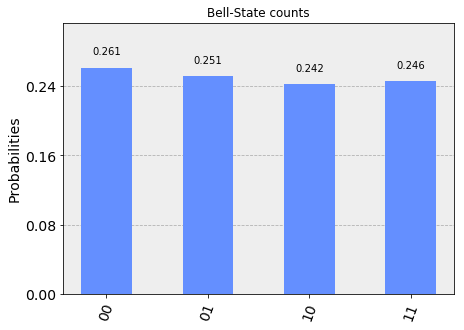

In [28]:
result = execute(bell, simulator).result()
counts = result.get_counts(bell)
plot_histogram(counts, title='Bell-State counts')

### Extended Circuit -2 

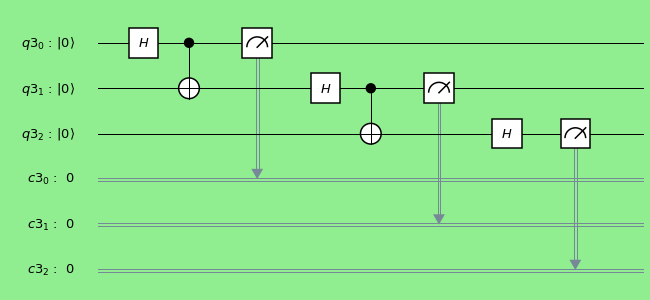

In [52]:
n =3
q = QuantumRegister(n)
c = ClassicalRegister(n)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.h(q[1])
circ.cx(q[1], q[2])
circ.h(q[2])
circ.measure(q,c)

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
circ.draw(output='mpl', style = style)

- Initial state: |000>
- After Hadamard Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|100> $
- After CNOT Gate : $\frac{1}{\sqrt{2}}|000> + \frac{1}{\sqrt{2}}|110> $
- After Hadamard Gate : $\frac{1}{{2}}|000> + \frac{1}{{2}}|010>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|110>$
- After CNOT Gate :$\frac{1}{{2}}|000> + \frac{1}{{2}}|011>  +  \frac{1}{{2}}|100> - \frac{1}{{2}}|111>$
- After Hadamard Gate :$\frac{1}{2\sqrt{2}}|000> + \frac{1}{2\sqrt{2}}|001> + \frac{1}{2\sqrt{2}}|010>  - \frac{1}{2\sqrt{2}}|011> +  \frac{1}{2\sqrt{2}}|100> + \frac{1}{2\sqrt{2}}|101>  - \frac{1}{2\sqrt{2}}|110> + \frac{1}{2\sqrt{2}}|111>$


In [49]:
simulator = Aer.get_backend('qasm_simulator')

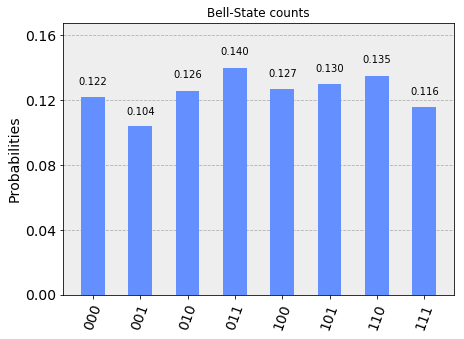

In [50]:
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

### Quantum Fourier Transform

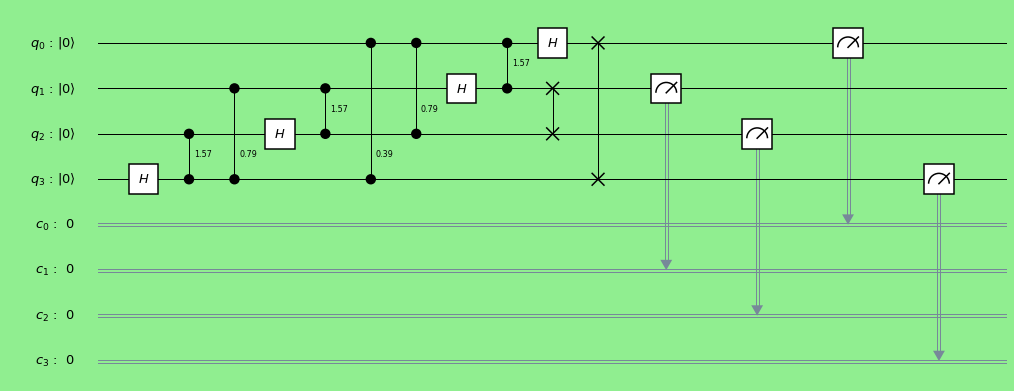

In [17]:
qc = QuantumCircuit()

q = QuantumRegister(4, 'q')
c = ClassicalRegister(4, 'c')

qc.add_register(q)
qc.add_register(c)

qc.h(q[3])
qc.cu1(np.pi / 2, q[2], q[3])
qc.h(q[2])
qc.cu1(np.pi / 4, q[1], q[3])
qc.cu1(np.pi / 2, q[1], q[2])
qc.h(q[1])
qc.cu1(np.pi / 8, q[0], q[3])
qc.cu1(np.pi / 4, q[0], q[2])
qc.cu1(np.pi / 2, q[0], q[1])
qc.h(q[0])
qc.swap(q[0], q[3])
qc.swap(q[1], q[2])

qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style)

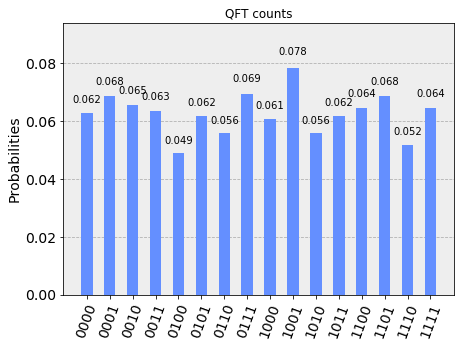

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='QFT counts')

### Grover Algorithm

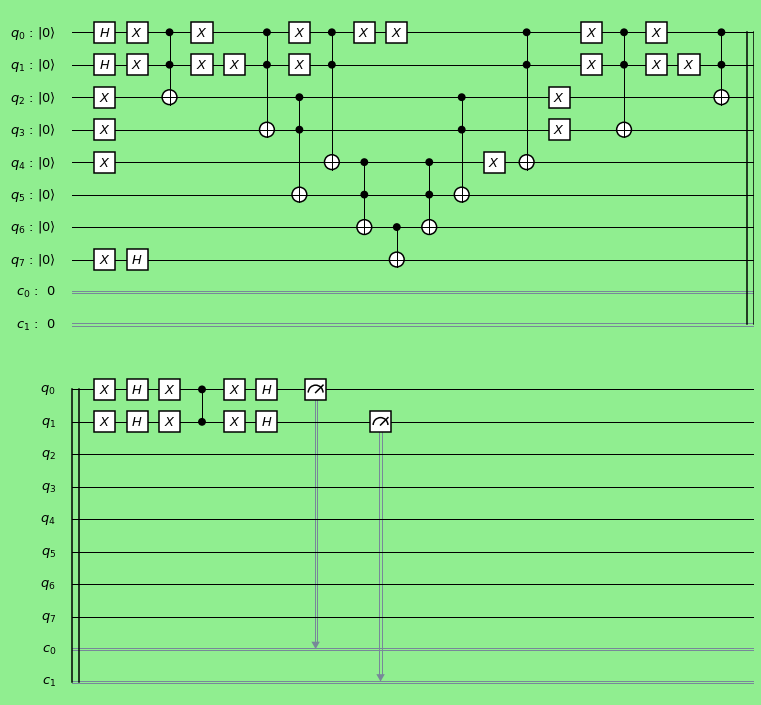

In [24]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
import numpy as np

qc = QuantumCircuit()

q = QuantumRegister(8, 'q')
c = ClassicalRegister(2, 'c')

qc.add_register(q)
qc.add_register(c)

qc.h(q[0])
qc.h(q[1])
qc.x(q[7])
qc.h(q[7])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[0])
qc.x(q[1])
qc.x(q[1])
qc.x(q[3])
qc.ccx(q[0], q[1], q[3])
qc.x(q[1])
qc.x(q[0])
qc.x(q[4])
qc.ccx(q[1], q[0], q[4])
qc.x(q[0])
qc.ccx(q[3], q[2], q[5])
qc.ccx(q[5], q[4], q[6])
qc.cx(q[6], q[7])
qc.ccx(q[4], q[5], q[6])
qc.ccx(q[2], q[3], q[5])
qc.x(q[0])
qc.x(q[4])
qc.ccx(q[0], q[1], q[4])
qc.x(q[0])
qc.x(q[1])
qc.x(q[3])
qc.ccx(q[0], q[1], q[3])
qc.x(q[1])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[0])
qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
qc.x(q[0])
qc.x(q[1])
qc.cz(q[0], q[1])
qc.x(q[0])
qc.x(q[1])
qc.h(q[0])
qc.h(q[1])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style,scale =0.5)

In [20]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend)
job_result = job.result()
print(job_result.get_counts(qc))

{'11': 1024}


### References

1. https://quantumcomputing.stackexchange.com/questions/2299/how-to-interpret-a-quantum-circuit-as-a-matrix